In [1]:
using Distributions
using Images, Colors, FixedPointNumbers
import Plots
Plots.gr()

Plots.GRBackend()

In [261]:
include("../src/KernelICA.jl")

kgv

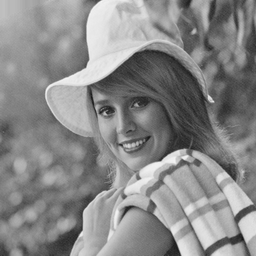

In [233]:
lena = load("../data/lena.tiff")
fabio = load("../data/fabio.tiff")
elaine = load("../data/elaine.tiff")

# Image Unmixing

In [234]:
N = 256*256
slena = float(reshape(reinterpret(UInt8,data(lena)),N))
sfabio = float(reshape(reinterpret(UInt8,data(fabio)),N))
selaine = float(reshape(reinterpret(UInt8,data(elaine)),N))

65536-element Array{Float64,1}:
 190.0
 190.0
 191.0
 192.0
 192.0
 188.0
 188.0
 186.0
 183.0
 183.0
 185.0
 185.0
 185.0
   ⋮  
 130.0
 106.0
  94.0
  88.0
  73.0
  68.0
  96.0
 142.0
 154.0
 155.0
 167.0
 169.0

In [235]:
s = [slena sfabio selaine]'

3×65536 Array{Float64,2}:
 162.0  162.0  160.0  162.0  164.0  …   80.0   91.0   99.0  103.0  106.0
 127.0  123.0  121.0  116.0  114.0     179.0  178.0  174.0  168.0  165.0
 190.0  190.0  191.0  192.0  192.0     142.0  154.0  155.0  167.0  169.0

In [236]:
A = [1/2 1/4 1/4; 1/4 1/2 1/4; 1/4 1/4 1/2]

3×3 Array{Float64,2}:
 0.5   0.25  0.25
 0.25  0.5   0.25
 0.25  0.25  0.5 

In [237]:
det(A)

0.0625

In [238]:
x = A * s

3×65536 Array{Float64,2}:
 160.25  159.25  158.0   158.0  158.5  …  128.5   131.75  135.25  136.5 
 151.5   149.5   148.25  146.5  146.0     150.25  150.5   151.5   151.25
 167.25  166.25  165.75  165.5  165.5     144.25  145.75  151.25  152.25

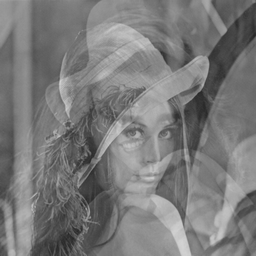

In [239]:
x_1 = reshape(x[1,:],(256,256))
x_1 = round(x_1)
x_1 = convert(Array{UInt8,2}, x_1)
imwrite(grayim(x_1),"../figures/mix1.png")
grayim(x_1)

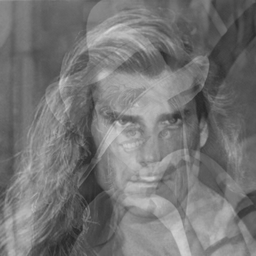

In [240]:
x_2 = reshape(x[2,:],(256,256))
x_2 = round(x_2)
x_2 = convert(Array{UInt8,2}, x_2)
imwrite(grayim(x_2),"../figures/mix2.png")
grayim(x_2)

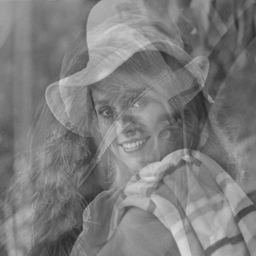

In [241]:
x_3 = reshape(x[3,:],(256,256))
x_3 = round(x_3)
x_3 = convert(Array{UInt8,2}, x_3)
imwrite(grayim(x_3),"../figures/mix3.png")
grayim(x_3)

In [14]:
size(x)

(3,65536)

In [242]:
xc, m = centering(x')
print("Centering... OK")

Centering... OK

In [243]:
xw, E, D = whiten(xc)
print("Whitening... OK")

Whitening... OK

In [275]:
w_fica, s_fica = fastICA(xw,3)
print("FastICA... OK")

FastICA... OK

In [ ]:
w_kgv, s_kgv = kgv(xw')
print("KGV... OK")

In [62]:
size(s_fica)

(65536,3)

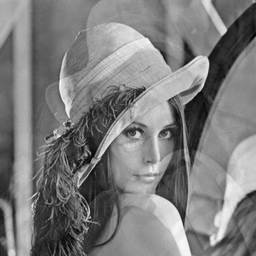

In [276]:
s_1 = reshape(s_fica[:,1],(256,256))
m1 = minimum(s_1)
M1 = maximum(s_1)
s_1 = (s_1 - m1) * 255/ (M1 - m1)
s_1 = round(s_1)
s_1 = convert(Array{UInt8,2}, s_1)
imwrite(grayim(s_1),"../figures/s1.png")
grayim(s_1)

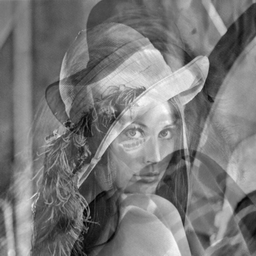

In [273]:
s_2 = reshape(s_fica[:,2],(256,256))
m2 = minimum(s_2)
M2 = maximum(s_2)
s_2 = (s_2 - m2) * 255/ (M2 - m2)
s_2 = round(s_2)
s_2 = convert(Array{UInt8,2}, s_2)
imwrite(grayim(s_2),"../figures/s2.png")
grayim(s_2)

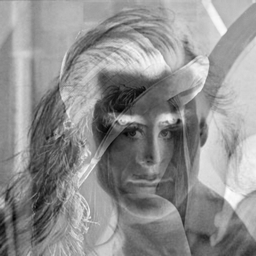

In [274]:
s_3 = reshape(s_fica[:,3],(256,256))
m3 = minimum(s_3)
M3 = maximum(s_3)
s_3 = (s_3 - m3) * 255/ (M3 - m3)
s_3 = round(s_3)
s_3 = convert(Array{UInt8,2}, s_3)
imwrite(grayim(s_3),"../figures/s3.png")
grayim(s_3)

# ICA Basis

In [175]:
img = load("../data/lena.tiff")
f = float(reinterpret(UInt8,data(img)))
N = size(f,1)

256

In [220]:
ws = 16
mc = Int((N/ws))
M = Int(mc*mc)
N = Int(ws*ws)

256

In [192]:
lena_windows = zeros((M,N))
k = 1
for j = 1:mc
    for i = 1:mc
        lena_windows[k,:] = reshape(f[(1+ws*(i-1)):(ws*i),(1+ws*(j-1)):(ws*j)],n)
        k = k + 1
    end
end

In [178]:
size(lena_windows)

(256,256)

In [193]:
lena_c, _ = centering(lena_windows')
print("Centering... Ok")

Centering... Ok

In [194]:
lena_w , E, D = whiten(lena_c')
print("Whitening... Ok")

Whitening... Ok

In [228]:
w, lena_ica = fastICA(lena_w,M)
print("FastICA... Ok")

FastICA... Ok

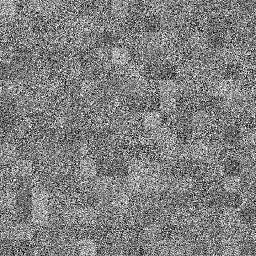

In [231]:
A = (E' * D^(0.5) * E) * w^-1
lena_basis = zeros((M,M))
k = 1
for j = 1:mc
    for i = 1:mc
        temp = A[k,:]
        temp = reshape(temp,(ws,ws))
        m = minimum(temp)
        Ma = maximum(temp)
        temp = (temp - m) * 255/ (Ma - m)
        temp = round(temp)
        lena_basis[(1+ws*(i-1)):(ws*i),(1+ws*(j-1)):(ws*j)] = temp
        k = k + 1
    end
end
lena_basis = convert(Array{UInt8,2}, lena_basis)
imwrite(grayim(lena_basis),"../figures/basis.png")
grayim(lena_basis)